# 3. Data Analysis and Visulization

In [1]:
# Import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import numpy as np 

In [2]:
patients_df = pd.read_csv('analysis_data/patients.csv', dtype={'FIPS Code':str})
patients_df.iloc[-1,0] = 'NA'
patients_df.set_index('FIPS Code', drop=True, inplace=True)
patients_df = patients_df.drop('2021-04', axis = 1)
patients_df 

2020-01  2020-02  2020-03  2020-04  2020-05  2020-06   2020-07  \
FIPS Code                                                                   
01001          0.0      0.0     14.0     38.0    148.0    326.0     485.0   
01003          0.0      0.0     62.0    131.0     72.0    428.0    2073.0   
01005          0.0      0.0      0.0     40.0     91.0    146.0     228.0   
01007          0.0      0.0      0.0     35.0     29.0     97.0     190.0   
01009          0.0      0.0     13.0     32.0     15.0    144.0     555.0   
...            ...      ...      ...      ...      ...      ...       ...   
56039          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
56041          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
56043          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
56045          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
NA          2088.0   1800.0  20080.0  47847.0  55253.0  63919.0  111954.0   

           2020-08   2020-09   2020-10   2020-11   2020-12   2021-01  \
FIPS Code                                                              
01001        386.0     331.0     391.0     733.0    1383.0    1536.0   
01003       1370.0    1340.0     937.0    2060.0    3994.0    4489.0   
01005        144.0     147.0     155.0     117.0     258.0     418.0   
01007        173.0     114.0     203.0     340.0     563.0     473.0   
01009        538.0     297.0     510.0    1083.0    1552.0     993.0   
...            ...       ...       ...       ...       ...       ...   
56039          0.0       0.0       0.0       0.0       0.0       0.0   
56041          0.0       0.0       0.0       0.0       0.0       0.0   
56043          0.0       0.0       0.0       0.0       0.0       0.0   
56045          0.0       0.0       0.0       0.0       0.0       0.0   
NA         84834.0  128778.0  178445.0  286222.0  347651.0  218961.0   

            2021-02  2021-03  
FIPS Code                     
01001         578.0    210.0  
01003        1516.0    417.0  
01005         159.0     68.0  
01007         123.0     53.0  
01009         328.0    267.0  
...             ...      ...  
56039           0.0      0.0  
56041           0.0      0.0  
56043           0.0      0.0  
56045           0.0      0.0  
NA         153776.0  59089.0  

[3143 rows x 15 columns]

In [3]:
icu_df = pd.read_csv('analysis_data/icu.csv',dtype={'FIPS Code':str})
icu_df.iloc[-1,0] = 'NA'
icu_df.set_index('FIPS Code', drop=True, inplace=True)
icu_df  = icu_df.drop('2021-04', axis = 1)

In [5]:
census_data = pd.read_csv('analysis_data/census_2019.csv',dtype={'FIPS Code':str})
census_data.set_index('FIPS Code', drop=True, inplace=True)
census_data 

<<<<<<< HEAD
NaN                                              FIPS Code STNAME          CTYNAME        POPESTIMATE2019 TOT_MALE TOT_FEMALE 0 - 17 years 18 - 49 years 50 - 64 years 65 + years Percent Hispanic Percent non-Hispanic American Indian/Alaska Native Percent non-Hispanic Asian Percent non-Hispanic Black Percent non-Hispanic Native Hawaiian/Pacific Is... Percent non-Hispanic White Percent non-Hispanic Other Latitude               Longitude
0                                                01001     Alabama         Autauga County 55869           27092    28777      14252        21652         11041         8924       0.0283           0.0025                                             0.0103                     0.19                       0.0001                                             0.746                      0.6548                     32.756889             -86.844516
1                                                01003     Alabama         Baldwin County 223234          108247   114987     52268        77402         46734         46830      0.0456           0.0065                                             0.0092                     0.0917                     0.0                                                0.8307                     0.671                      32.756889             -86.844516
2                                                01005     Alabama         Barbour County 24686           13064    11622      5595         9477          4753          4861       0.0436           0.0029                                             0.0048                     0.4744                     0.0                                                0.4581                     0.34630000000000005        32.756889             -86.844516
3                                                01007     Alabama         Bibb County    22394           11929    10465      4992         9233          4436          3733       0.0257           0.0013                                             0.0012                     0.2214                     0.0                                                0.7453                     0.6354                     32.756889             -86.844516
...                                                                                                                                                                                                                                                                                                                                                                                                                                               ...
56039                                            Wyoming   Teton County    23464          12142           11322    4586       10694        4467          3717          0.1503     0.0033           0.0125                                             0.0124                     0.0012                     0.8134                                             0.5153                     43.51584444444444          -110.81563333333332          NaN
56041                                            Wyoming   Uinta County    20226          10224           10002    6215       7229         3757          3025          0.0913     0.0065           0.0016                                             0.0011                     0.0                        0.8752                                             0.6935                     41.29352857142857          -110.53935714285716          NaN
56043                                            Wyoming   Washakie County 7805           3963            3842     1960       2506         1609          1730          0.1423     0.0052           0.0                                                0.0004                     0.0                        0.819                                              0.5881000000000001         44.01875                   -107.7013                    NaN
56045                                        

In [ ]:
death_df = pd.read_csv('analysis_data/death.csv',dtype={'FIPS Code':str})
death_df.iloc[-1,0] = 'NA'
death_df.set_index('FIPS Code', drop=True, inplace=True)
death_df  = death_df.drop('2021-04', axis = 1)

In [ ]:
total_abs = pd.read_csv('analysis_data/total_abs.csv',dtype={'FIPS Code':str})
total_abs.iloc[-1,0] = 'NA'
total_abs.set_index('FIPS Code', drop=True, inplace=True)
total_abs

In [ ]:
vaccination_df = pd.read_csv('analysis_data/vaccination_data.csv',dtype={'FIPS Code':str})
vaccination_df.set_index('FIPS Code', drop=True, inplace=True)
vaccination_df = vaccination_df[["Social Vulnerability Index (SVI)","SVI Category","Percent adults fully vaccinated against COVID-19"]]
vaccination_df

In [ ]:
tot_rel = pd.DataFrame((total_abs.iloc[0:-1,:]["Patients"]/census_data["POPESTIMATE2019"]), columns = ["Patients"])
tot_rel["Hospitalized"] = (total_abs.iloc[0:-1,:]["Hospitalized"]/census_data["POPESTIMATE2019"])
tot_rel["ICU"]= (total_abs.iloc[0:-1,:]["ICU"]/census_data["POPESTIMATE2019"])
tot_rel["Death"]= (total_abs.iloc[0:-1,:]["Death"]/census_data["POPESTIMATE2019"])
tot_rel

In [ ]:
total_abs

In [ ]:
worst_fip_patient= abs_cases.sort_values(ascending=False)
worst_fip_patient

In [ ]:
total_abs.loc["21003"]

In [ ]:
census_data.loc["21003"]

In [ ]:
vaccination_df.loc["21003"]

In [ ]:
vaccination_df.mean()

In [ ]:
#See most affected FIPS and less affected FIPS ( by patient number)
worst_fip_patient= total_abs.sort_values(by='Patients', ascending=False)
worst_fip_patient.head()

In [ ]:
worst_ten_pat = worst_fip_patient.iloc[1:11, :]
worst_ten_pat

In [ ]:
worst_ten_pat.to_csv('analysis_data/most_affected.csv')

In [ ]:
best_fip_patient= total_abs.sort_values(by='Patients', ascending=True)
best_fip_patient.head(1650)

In [ ]:
best_ten_pat = best_fip_patient.iloc[1:11, :]
best_ten_pat

In [ ]:
best_ten_pat.to_csv('analysis_data/least_affected.csv')

In [ ]:
#See most affected FIPS and less affected FIPS ( by death number)
worst_fip_death = total_abs.sort_values(by='Death', ascending=False)

In [ ]:
worst_ten_death = worst_fip_death.iloc[0:11, :]
worst_ten_death

## Vaccinated vs. Time 

## Time Line for worst FIPS 

## Demographic description of most affected FIPS

----

In this section we will decribe the demographic characteristics of the most affected counties, we will also compare them. With this purporse in mind, we will use bar graphics to facilitate the comparison. 


### 1. Data loading and pre-processing

In [6]:
# For this analysis, we are going to use the census csv and the most affected csv files.
# We are going to compare the demographic description of the most affected counties

most_affected= pd.read_csv('analysis_data/most_affected.csv', dtype={'FIPS Code':str})
most_affected.set_index('FIPS Code', drop=True, inplace=True)

In [7]:
# We call the csv census file. 
# We use the fips code of the most affected counties to select the census information.

census_combined = pd.read_csv('clean_data/census_2019_combined.csv', dtype={'FIPS Code':str})
census_combined.set_index('FIPS Code', drop=True, inplace=True)
census_combined = census_combined.loc[most_affected.index]

In [20]:
# We call the Vaccination data

vaccination = pd.read_csv('analysis_data/vaccination_data.csv', dtype={'FIPS Code':str})

In [8]:
# We start creating the daframes.
# In this case, we will select the totals of each gender.

worst_gender = census_combined[['TOT_MALE', 'TOT_FEMALE']]

In [9]:
# In order to observe the real gender values (total divided by county population), we must create a new dataframe with
# the relative values we obtained.

worst_gender_rel = pd.DataFrame((worst_gender["TOT_MALE"]/census_combined["POPESTIMATE2019"]), columns = ['REL_MALE'])
worst_gender_rel['REL_FEMALE'] = worst_gender["TOT_FEMALE"]/census_combined["POPESTIMATE2019"]

In [10]:
# Now, we select the information regarding age.

worst_agegroup = census_combined[['0 - 17 years', '18 - 49 years', '50 - 64 years', '65 + years']]

In [11]:
# We create the compared age dataframe

worst_age_rel = pd.DataFrame((worst_agegroup["0 - 17 years"]/census_combined["POPESTIMATE2019"]), 
                             columns = ['0 - 17 years'])
worst_age_rel['18 - 49 years'] = worst_agegroup["18 - 49 years"]/census_combined["POPESTIMATE2019"]
worst_age_rel['50 - 64 years'] = worst_agegroup["50 - 64 years"]/census_combined["POPESTIMATE2019"]
worst_age_rel['65 + years'] = worst_agegroup["65 + years"]/census_combined["POPESTIMATE2019"]

In [12]:
# We create the ehtnic group dataframe
# Since the information is already in percentages, so we don't need a compared dataframe.

worst_ethnic = census_combined[['Percent Hispanic', 'Percent non-Hispanic American Indian/Alaska Native', 
                                'Percent non-Hispanic Asian', 'Percent non-Hispanic Black', 
                                'Percent non-Hispanic Native Hawaiian/Pacific Islander', 
                                'Percent non-Hispanic White']]

### 2. Data visualization

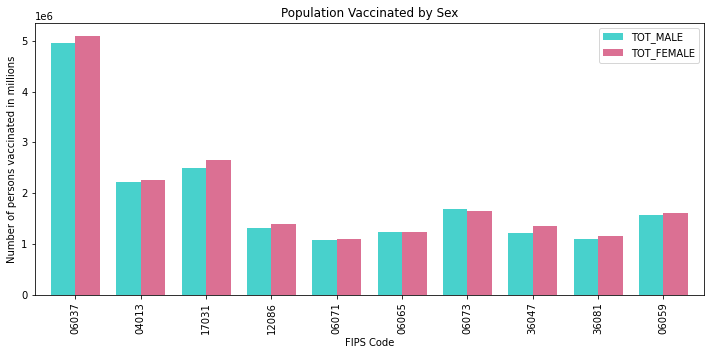

In [13]:
# We begin with the visualization
# In order to fully observe the variations of the demographic characteristics, we chose a graph bar for this section.
# Since we have fully usable dataframes, we won't use matplotlib to graph them, we will use .plot()

gender_graph= worst_gender.plot(kind='bar', width = 0.75, figsize=(12,5), color=['mediumturquoise', 'palevioletred'])
gender_graph
plt.title("Population Vaccinated by Sex")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")
plt.savefig('figures/gender_graph_abs.png', dpi=300, bbox_inches = "tight")
plt.show()

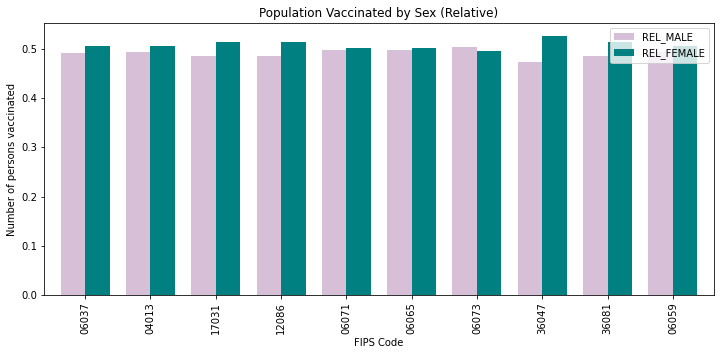

In [14]:
# Now we use the compared gender dataframe to create a friendly visualization. 

gender_graph_rel= worst_gender_rel.plot(kind='bar', width = 0.75, figsize=(12, 5), color=['thistle', 'teal'])
gender_graph_rel
plt.title("Population Vaccinated by Sex (Relative)")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated")
plt.savefig('figures/gender_graph_rel.png', dpi=300, bbox_inches = "tight")


plt.show()

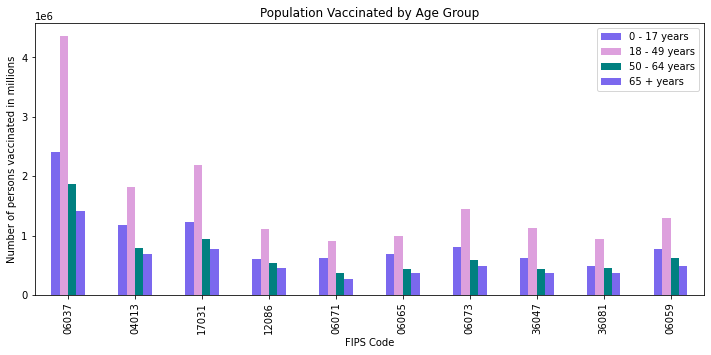

In [15]:
# We repeat the process for the Age Group dataframe

worst_agegroup.plot(kind='bar', figsize=(12,5), color=['mediumslateblue', 'plum', 'teal'])
plt.title("Population Vaccinated by Age Group")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")
plt.savefig('figures/worst_agegroup.png', dpi=300, bbox_inches = "tight")


plt.show()

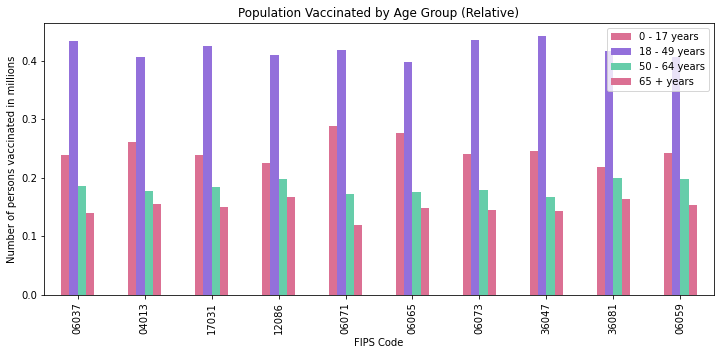

In [16]:
# Same process for the compared Age Group.

age_rel_grahp = worst_age_rel.plot(kind='bar', figsize=(12, 5), color=['palevioletred', 'mediumpurple', 'mediumaquamarine'])
plt.title("Population Vaccinated by Age Group (Relative)")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")
plt.savefig('figures/age_rel_grahp.png', dpi=300, bbox_inches = "tight")


plt.show()

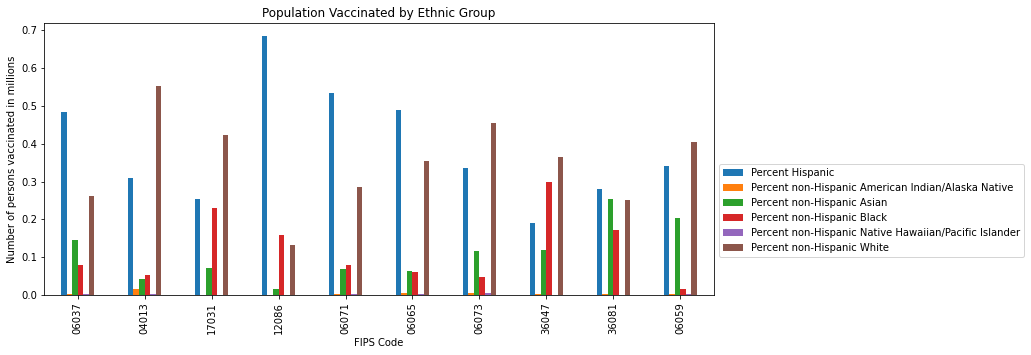

In [17]:
# We follow the same process for the percentages of ethnic group.

worst_ethnic.plot(kind='bar', figsize=(12, 5))
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.title("Population Vaccinated by Ethnic Group")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")
plt.savefig('figures/worst_fips_eth.png', dpi=300, bbox_inches = "tight")


plt.show()

## Demographics regressions

In this section, we will see if there is a relation between the fully vaccinated adults and their ethnic group. In order to do this, we'll make scatter plots, we'll calculate the Pearson Coefficient, the Linear regression Coefficient and graph it, all of this for each ethnic group. We'll do this in hopes of finding a relation.

### 1. Data loading and pre-processing

In [21]:
# We create the dataframe we need from the Vaccionation Dataset previously imported. 

full = vaccination['Percent adults fully vaccinated against COVID-19']
hisp = vaccination['Percent Hispanic']
nat = vaccination['Percent non-Hispanic American Indian/Alaska Native']
asian = vaccination['Percent non-Hispanic Asian']
black = vaccination['Percent non-Hispanic Black']
pac = vaccination['Percent non-Hispanic Native Hawaiian/Pacific Islander']
white = vaccination['Percent non-Hispanic White']

pers_vaccinated = pd.DataFrame(data={full.name:full, hisp.name:hisp, nat.name:nat, asian.name:asian, black.name:black, 
                                    pac.name:pac, white.name:white})

# In order to do the linear regression, our dataframe must be clean from empty values and NAN's. In order to do this,
# dropna()

pers_vaccinated.dropna(inplace=True)

### 2. Data visualization

Pearson correlation coefficient (r-value): -0.04
Linear reggression coefficient of detemination (r-squared): 0.0019


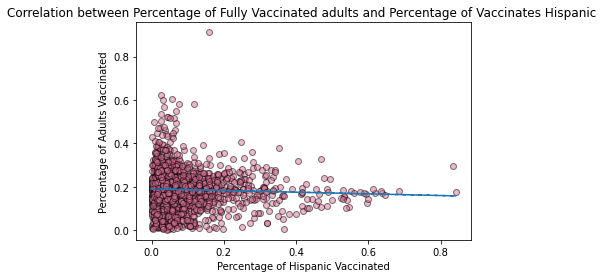

In [28]:
# To create our scatter plots, we must define our variables. Y variable will be the fully vaccionated adults 
# and x will be the percentage of each ethnic group. 

adults_vacc = pers_vaccinated['Percent adults fully vaccinated against COVID-19']
hisp_vacc= pers_vaccinated['Percent Hispanic']
plt.scatter(hisp_vacc, adults_vacc, color='palevioletred', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinates Hispanic ")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Hispanic Vaccinated")

# We run the linear regression, graphic it and calculate the coefficients. 

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(hisp_vacc, adults_vacc)
vc_fit = vc_slope * hisp_vacc + vc_int
plt.plot(hisp_vacc,vc_fit,"--")

print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(hisp_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(hisp_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")

plt.show()

Pearson correlation coefficient (r-value): 0.33
Linear reggression coefficient of detemination (r-squared): 0.1078


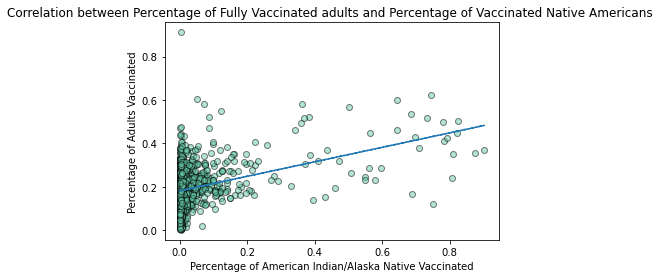

In [23]:
# We will repeat this process for each ethnic group. 

nat_vacc= pers_vaccinated['Percent non-Hispanic American Indian/Alaska Native']
plt.scatter(nat_vacc, adults_vacc, color='mediumaquamarine', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinated Native Americans ")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of American Indian/Alaska Native Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(nat_vacc, adults_vacc)
vc_fit = vc_slope * nat_vacc + vc_int
plt.plot(nat_vacc,vc_fit,"--")


print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(nat_vacc, adults_vacc)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nat_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")



plt.show()

Pearson correlation coefficient (r-value): 0.04
Linear reggression coefficient of detemination (r-squared): 0.0019


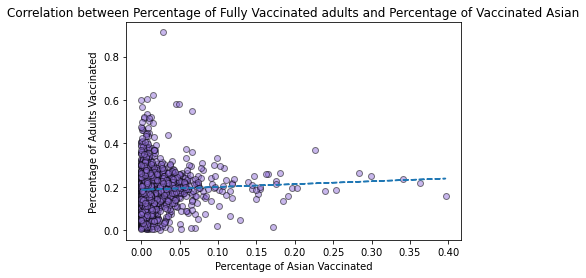

In [24]:
asian_vacc= pers_vaccinated['Percent non-Hispanic Asian']
plt.scatter( asian_vacc, adults_vacc, color='mediumpurple', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinated Asian")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Asian Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(asian_vacc, adults_vacc)
vc_fit = vc_slope * asian_vacc + vc_int
plt.plot(asian_vacc,vc_fit,"--")


print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(asian_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(asian_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")



plt.show()

Pearson correlation coefficient (r-value): -0.25
Linear reggression coefficient of detemination (r-squared): 0.0639


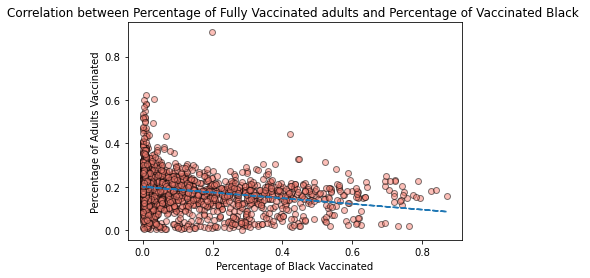

In [25]:
black_vacc= pers_vaccinated['Percent non-Hispanic Black']
plt.scatter(black_vacc, adults_vacc, color='salmon', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinated Black ")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Black Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(black_vacc, adults_vacc)
vc_fit = vc_slope * black_vacc + vc_int
plt.plot(black_vacc,vc_fit,"--")

print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(black_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(black_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")


plt.show()

Pearson correlation coefficient (r-value): 0.04
Linear reggression coefficient of detemination (r-squared): 0.0020


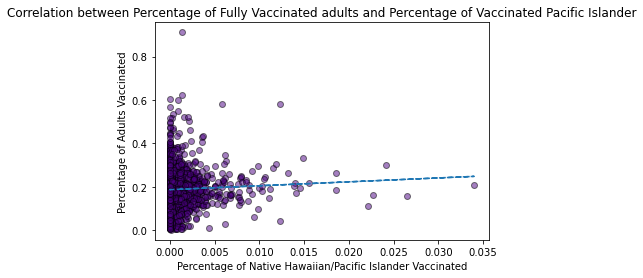

In [26]:
pacific_vacc= pers_vaccinated['Percent non-Hispanic Native Hawaiian/Pacific Islander']
plt.scatter(pacific_vacc, adults_vacc, color='indigo', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinated Pacific Islander")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Native Hawaiian/Pacific Islander Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(pacific_vacc, adults_vacc)
vc_fit = vc_slope * pacific_vacc + vc_int
plt.plot(pacific_vacc,vc_fit,"--")

print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(pacific_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(pacific_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")


plt.show()

Pearson correlation coefficient (r-value): 0.07
Linear reggression coefficient of detemination (r-squared): 0.0052


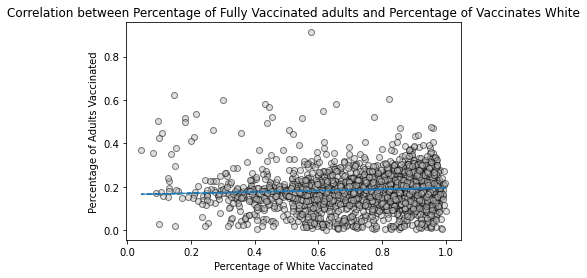

In [27]:
white_vacc= pers_vaccinated['Percent non-Hispanic White']
plt.scatter(white_vacc, adults_vacc, color='silver', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinates White")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of White Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(white_vacc, adults_vacc)
vc_fit = vc_slope * white_vacc + vc_int
plt.plot(white_vacc,vc_fit,"--")

print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(white_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(white_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")


plt.show()

## Scatter (patients and vaccinated) 

## Bars for ethnic groups 

## Heatmap 

## Regressions for sex, age and ethnic group 